In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer 

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
#description
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [8]:
df_feat=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [9]:
df_feat.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancer['target']
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [14]:
from sklearn.cross_validation import train_test_split
X=df_feat
y=cancer['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.svm import SVC

In [39]:
model=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
predictions=model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 54  10]
 [  3 104]]


             precision    recall  f1-score   support

          0       0.95      0.84      0.89        64
          1       0.91      0.97      0.94       107

avg / total       0.93      0.92      0.92       171



In [22]:
#grid search allows to find parameters.
# large C value gives low bias and high variance.
# small C value high bias and low variance
#gamma radio basis function: small gamma means a gaussian of large variance.
#large gamma means high bias and low variance.
from sklearn.grid_search import GridSearchCV

In [32]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [33]:
# verbose: description of the process.
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=3)

In [34]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.626866 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.628788 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.628788 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.626866 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.628788 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.628788 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.893939 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.626866 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.628788 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.628788 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.626866 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.628788 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.628788 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [35]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [36]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
grid_predictions=grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 54  10]
 [  3 104]]


             precision    recall  f1-score   support

          0       0.95      0.84      0.89        64
          1       0.91      0.97      0.94       107

avg / total       0.93      0.92      0.92       171



In [46]:
iris=sns.load_dataset('iris')

In [47]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


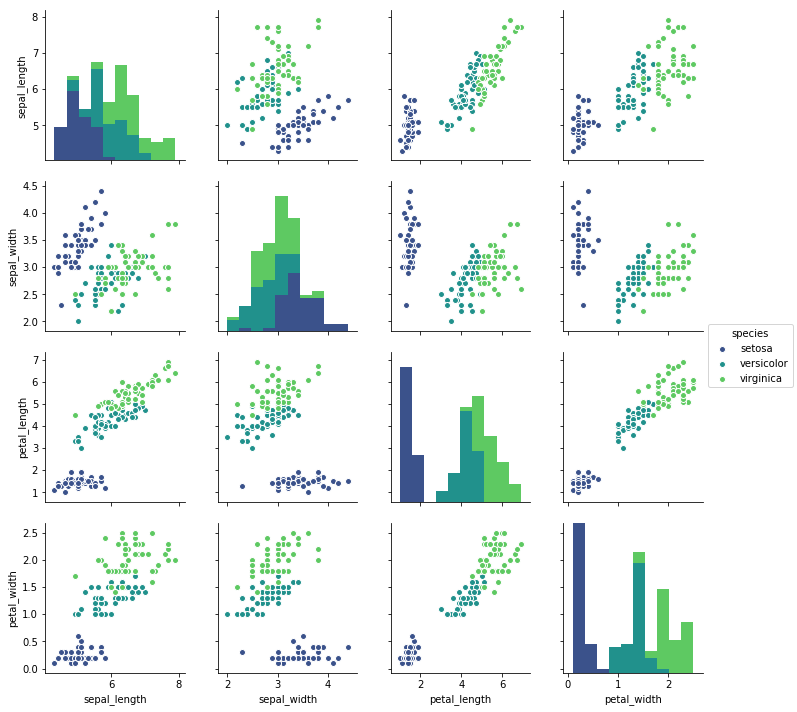

In [51]:
sns.pairplot(iris,hue='species',palette='viridis')

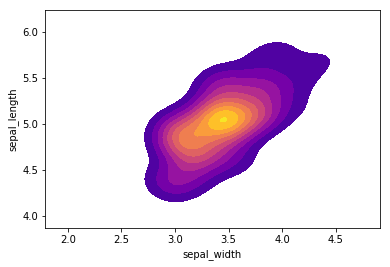

In [87]:
sns.kdeplot(iris[iris['species']=='setosa']['sepal_width'],iris[iris['species']=='setosa']['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)

In [61]:
from sklearn.cross_validation import train_test_split

In [68]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [69]:
from sklearn.svm import SVC

In [70]:
model=SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
predictions=model.predict(X_test)

In [75]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17  0  0]
 [ 0 13  2]
 [ 0  0 13]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      0.87      0.93        15
  virginica       0.87      1.00      0.93        13

avg / total       0.96      0.96      0.96        45



In [77]:
from sklearn.grid_search import GridSearchCV

In [78]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [79]:
# verbose: description of the process.
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=3)

In [80]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.944444 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.942857 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.970588 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.916667 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.885714 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.970588 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.972222 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.942857 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.970588 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.972222 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=1.000000 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=1.000000 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.944444 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [81]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [82]:
grid_predictions=grid.predict(X_test)

In [84]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      0.93      0.97        15
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45

